In [1]:
#First we will import our Dataset

import pandas as pd
data = pd.read_csv('musk_csv.csv')

In [2]:
# Now lets try to print our data set head

data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [3]:
#PREPROCESSING OF DATA

In [4]:
import numpy as np

In [5]:
#we wil check the missing values in our Dataset

data.isna().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [6]:
#Now, we have to drop the column which doesnt havce any values in it.

corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.92)]
df = data.drop(columns = to_drop)

In [7]:
#Lets check the shape of the dataset obtained after pre-processing

df.shape

(6598, 117)

In [8]:
#DATASET SPLITING PART in 80:20

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train,test = train_test_split(df, random_state=30, test_size = 0.2)
Xtrain = train.iloc[:,3:-1]
Ytrain = train.iloc[:,-1:]
Xtest = test.iloc[:,3:-1]
Ytest = test.iloc[:,-1:]

In [11]:
#MODEL BASED ON CNN

In [12]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [13]:
a=[1]*Xtrain.shape[0]
Xtrain["demo"]=a

In [14]:
b=[1]*Xtest.shape[0]
Xtest["demo"]=b

In [15]:
x_train=Xtrain.values.reshape(Xtrain.shape[0],19,6,1)
x_test=Xtest.values.reshape(Xtest.shape[0],19,6,1)

In [16]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(19,6,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [18]:
history = model.fit(x_train,Ytrain,batch_size=128,epochs=25,validation_data=(x_test,Ytest))
score=model.evaluate(x_test,Ytest,verbose=0)
print(score)

Instructions for updating:
Use tf.cast instead.
Train on 5278 samples, validate on 1320 samples
Epoch 1/25
5278/5278 [==============================] - 3s 484us/step - loss: 2.5412 - acc: 0.8259 - val_loss: 1.5772 - val_acc: 0.8417
Epoch 2/25
5278/5278 [==============================] - 1s 258us/step - loss: 1.3711 - acc: 0.8528 - val_loss: 0.2437 - val_acc: 0.9159
Epoch 3/25
5278/5278 [==============================] - 1s 257us/step - loss: 0.3577 - acc: 0.8867 - val_loss: 0.1650 - val_acc: 0.9341
Epoch 4/25
5278/5278 [==============================] - 2s 286us/step - loss: 0.2554 - acc: 0.9075 - val_loss: 0.1895 - val_acc: 0.9386
Epoch 5/25
5278/5278 [==============================] - 1s 264us/step - loss: 0.2166 - acc: 0.9113 - val_loss: 0.1453 - val_acc: 0.9477
Epoch 6/25
5278/5278 [==============================] - 2s 293us/step - loss: 0.1828 - acc: 0.9265 - val_loss: 0.1714 - val_acc: 0.9394
Epoch 7/25
5278/5278 [==============================] - 1s 272us/step - loss: 0.1656 - a

In [19]:
#Here our training ends, our process completes here.
#So, its time to measure our model performance.

In [20]:
#PERFORMANSE MEASURES

In [21]:
import matplotlib.pyplot as plt

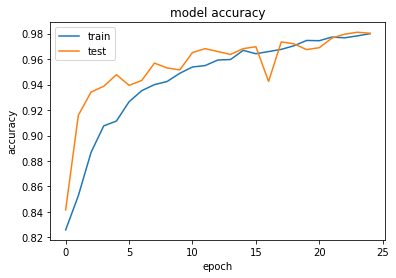

In [22]:
#Accuracy graph
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

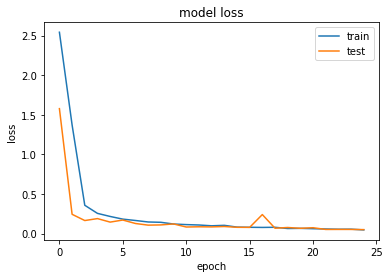

In [23]:
#Loss Graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [24]:
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score

In [25]:
print("f1_score:",f1_score(Ytest,model.predict_classes(x_test),))
print("recall:",recall_score(Ytest,model.predict_classes(x_test),))
print("Validation Loss:",score[0])
print("Validation Accuracy:",score[1])

f1_score: 0.9319371727748691
recall: 0.9222797927461139
Validation Loss: 0.0504310847245947
Validation Accuracy: 0.9803030303030303


In [26]:
model.save('model2.h5')